In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
customer_log_df = pd.read_excel('Data/customer_log.xlsx')

In [5]:
customer_log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344299 entries, 0 to 344298
Data columns (total 28 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   고객ID       344299 non-null  int64         
 1   사용기기       344299 non-null  object        
 2   사용OS       344299 non-null  object        
 3   유입경로       344299 non-null  object        
 4   회원상태       344299 non-null  object        
 5   거주지        344299 non-null  object        
 6   연령         344299 non-null  int64         
 7   성별         344299 non-null  object        
 8   서비스총구매수    344299 non-null  int64         
 9   총구매금액      344299 non-null  int64         
 10  총수정요청수     344299 non-null  float64       
 11  총추가결제금액    344299 non-null  int64         
 12  총수정요청수2    344299 non-null  int64         
 13  거래일자       344299 non-null  datetime64[ns]
 14  수수료율       344299 non-null  float64       
 15  프로그램수정횟수   344299 non-null  float64       
 16  추가결제금액     344299 no

# 수수료 관련 코드

## L사 가격 구간별 서비스 개수

## 각 회사 기준 적용시 산출된 수수료액

### 1. 현재 L사 수수료율 적용

In [6]:
customer_log_df['현재_수수료'] = customer_log_df['판매금액']*customer_log_df['수수료율']
L_fee = customer_log_df['현재_수수료'].sum()
print(f'현재 L사의 21년 상반기 매출: {L_fee}')

현재 L사의 21년 상반기 매출: 1506865144.6


### 2. 크몽 수수료율 적용

In [7]:
#크몽 수수료 산정 방식 - 전문가별 누적 판매 
def compute_kmong_fee(amount):
    if amount <= 700000:
        return amount * 0.09
    elif (amount >= 700000) & (amount <= 2000000): 
        return 700000 * 0.09 + (amount - 2000000) * 0.075
    else:
        return 700000 * 0.09 + 2000000 * 0.075 + (amount - 700000) * 0.065

customer_log_df['크몽_수수료'] = customer_log_df['판매금액'].apply(compute_kmong_fee)
kmong_fee = customer_log_df['크몽_수수료'].sum()
print(f'크몽 수수료 구간 적용시 L사의 상반기 매출: {kmong_fee}')

크몽 수수료 구간 적용시 L사의 상반기 매출: 1742177280.6499999


### 3. 위시캣 수수료 구간 적용

In [8]:
#위시캣 수수료 산정 방식
def compute_wishcat_fee(amount):
    if amount < 5000000:
        return amount * 0.09
    elif (amount >= 5000000) & (amount <= 10000000): 
        return amount * 0.075
    else:
        return amount * 0.065

customer_log_df['위시캣_수수료'] = customer_log_df['판매금액'].apply(compute_wishcat_fee)
wishcat_fee = customer_log_df['위시캣_수수료'].sum()
print(f'위시캣 수수료 구간 적용시 L사의 상반기 매출: {wishcat_fee}')

위시캣 수수료 구간 적용시 L사의 상반기 매출: 1926132054.9499998


### 4. 업워크 수수료 구간 적용

In [9]:
#업워크 수수료 산정 방식  - 같은 고객별로 누적해서 
upwork_fee_df = customer_log_df.groupby(['판매자','고객ID'])['판매금액'].sum().reset_index()

def compute_upwork_fee(amount):
    if amount < 500000:
        return amount * 0.09
    elif (amount >= 500000) & (amount <= 10000000): 
        return amount * 0.075
    else:
        return amount * 0.065

upwork_fee_df['업워크_수수료'] = upwork_fee_df['판매금액'].apply(compute_upwork_fee)
upwork_fee = upwork_fee_df['업워크_수수료'].sum()
print(f'업워크 수수료 구간 적용시 L사의 상반기 매출: {upwork_fee}')

업워크 수수료 구간 적용시 L사의 상반기 매출: 1843923461.2999995


In [13]:
print(f'위시캣 수수료 구간 적용시 L사의 21년 상반기 매출: {wishcat_fee:,.2f}')
print(f'업워크 수수료 구간 적용시 L사의 21년 상반기 매출: {upwork_fee:,.2f}')
print(f'크몽 수수료 구간 적용시 L사의 21년 상반기 매출: {kmong_fee:,.2f}')
print(f'L사의 21년 상반기 매출: {L_fee:,.2f}')

위시캣 수수료 구간 적용시 L사의 21년 상반기 매출: 1,926,132,054.95
업워크 수수료 구간 적용시 L사의 21년 상반기 매출: 1,843,923,461.30
크몽 수수료 구간 적용시 L사의 21년 상반기 매출: 1,742,177,280.65
L사의 21년 상반기 매출: 1,506,865,144.60


## 수수료율 함수

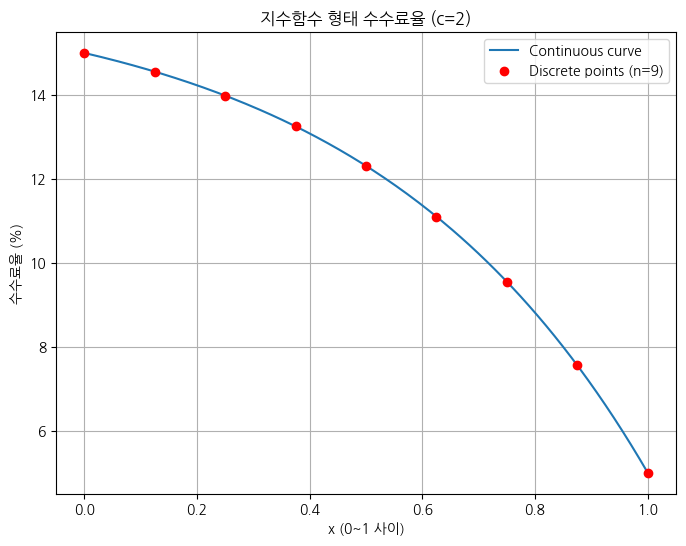

In [15]:
c = 2 # 지수 곡률

n = 9
x_disc = np.linspace(0, 1, n)
exp_rates_disc = 5 + 10 * (1 - (np.exp(c * x_disc) - 1) / (np.exp(c) - 1))

x_cont = np.linspace(0, 1, 200)
exp_rates_cont = 5 + 10 * (1 - (np.exp(c * x_cont) - 1) / (np.exp(c) - 1))


plt.figure(figsize=(8, 6))
plt.plot(x_cont, exp_rates_cont, label='Continuous curve')
plt.scatter(x_disc, exp_rates_disc, color='red', zorder=5, label='Discrete points (n=9)')
plt.xlabel('x (0~1 사이)')
plt.ylabel('수수료율 (%)')
plt.title('지수함수 형태 수수료율 (c=2)')
plt.legend()
plt.grid(True)
plt.show()


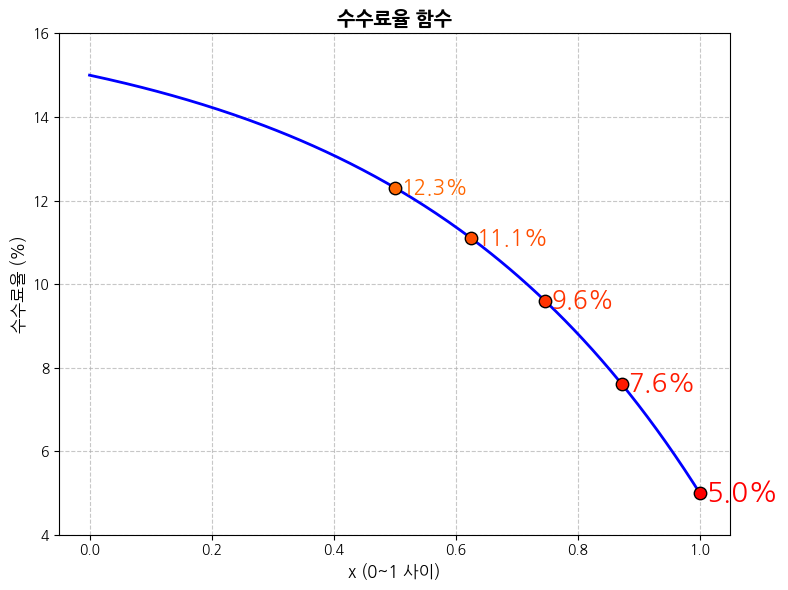

In [17]:
import matplotlib.colors as mcolors


def f(x, c=2):
    return 5 + 10 * (1 - (np.exp(c * x) - 1) / (np.exp(c) - 1))

def f_inv(y, c=2):
    return (1/c) * np.log(1 + (np.exp(c) - 1) * (15 - y) / 10)


def interpolate_color(color1, color2, t):
    return tuple(color1[i] + (color2[i] - color1[i]) * t for i in range(4))

n_points = 5  

y_vals = np.array([5, 7.6, 9.6, 11.1, 12.3])

start_color = mcolors.to_rgba("#FF0000")  
end_color   = mcolors.to_rgba("#FF6600")  


font_size_start = 20
font_size_end   = 15

# 시각화
plt.figure(figsize=(8,6))

x_cont = np.linspace(0, 1, 200)
y_cont = f(x_cont, c=c)
plt.plot(x_cont, y_cont, label="연속 곡선", color="blue", linewidth=2)

for i, y in enumerate(y_vals):
    t = i / (n_points - 1) 
    x = f_inv(y, c=c)
    
    color = interpolate_color(start_color, end_color, t)
    font_size = font_size_start + (font_size_end - font_size_start)*t
    
    # 수수료 지점
    plt.scatter(x, y, color=color, s=80, edgecolor='black', zorder=5)
    plt.text(x+0.01, y, f"{y:.1f}%", fontsize=font_size, color=color,
             va='center', zorder=6)

plt.xlabel("x (0~1 사이)", fontsize=12)
plt.ylabel("수수료율 (%)", fontsize=12)
plt.title("수수료율 함수", fontsize=14, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(4, 16)     
plt.tight_layout()
plt.show()


In [19]:
# 호용님 보내주신 기준으로 산정
def compute_wishcat_fee(amount):
    if amount > 5000000:
        return 0.05
    elif (amount > 1000000) and (amount <= 5000000):
        return 0.076
    elif (amount > 150000) and (amount <= 1000000):
        return 0.096
    elif (amount > 30000) and (amount <= 150000):
        return 0.111
    else:
        return 0.123

customer_log_df['재산정_수수료율'] = customer_log_df['판매금액'].apply(compute_wishcat_fee)
ReCal_L_fee = (customer_log_df['재산정_수수료율']*customer_log_df['판매금액']).sum()
print(f'재산정한 수수료율 적용시 L사의 상반기 매출: {ReCal_L_fee}')

재산정한 수수료율 적용시 L사의 상반기 매출: 2157252072.3199997


In [23]:
fee_list = {'크몽_구간_적용':kmong_fee,'위시캣_구간_적용':wishcat_fee,
            '업워크_구간_적용':upwork_fee, 'L사 재산정_수수료':ReCal_L_fee,'L사_원수익':L_fee}
fee_list = sorted(fee_list.items(), key=lambda x: x[1], reverse = True)

for name, fee in fee_list:
    print(f"{name}: {fee:,.2f}")

L사 재산정_수수료: 2,157,252,072.32
위시캣_구간_적용: 1,926,132,054.95
업워크_구간_적용: 1,843,923,461.30
크몽_구간_적용: 1,742,177,280.65
L사_원수익: 1,506,865,144.60
